## Imports

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data ready to be analized

In [58]:
english_language_knowledge_df = pd.read_json('../../wikidump/output_language_refactored/enwiki_20210201_refactored_language_dataset.json.gz', compression='gzip', lines=True)
# english_language_knowledge_df.head()

Number of rows and columns

In [59]:
english_language_knowledge_df.shape

(77741, 5)

Info about the datatype of the Pandas dataframe

In [60]:
english_language_knowledge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77741 entries, 0 to 77740
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_date               77741 non-null  object
 1   name                    77741 non-null  object
 2   num_languages_declared  77741 non-null  int64 
 3   languages               77741 non-null  object
 4   id                      77741 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


Basic stats

In [61]:
english_language_knowledge_df.describe()

,num_languages_declared,id
count,77741.000000,7.774100e+04
mean,2.827826,2.476217e+07
std,2.013859,1.943500e+07
min,1.000000,1.685900e+04
25%,2.000000,7.472217e+06
50%,2.000000,1.994746e+07
75%,4.000000,3.936084e+07
max,97.000000,6.661399e+07


Exploding the languages array into something more readable

In [62]:
english_languages_refactored_df = list()
# iterating over the previous dataset
for i, row in english_language_knowledge_df.iterrows():
    # explicit the language and the knowledge, a line for each occurrence in languages list
    for el in row['languages']:
        new_row = row
        new_row = new_row.drop('languages')
        new_row['language'] = el['lang']
        new_row['level'] = el['level']
        english_languages_refactored_df.append(new_row)
# build a new dataframe
english_languages_refactored_df = pd.DataFrame(english_languages_refactored_df).reset_index(drop=True)
# english_languages_refactored_df.head()

Number of elements in the dataset

In [63]:
english_languages_refactored_df.shape

(222720, 6)

Some info about the datatypes

In [64]:
english_languages_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222720 entries, 0 to 222719
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   edit_date               222720 non-null  object
 1   name                    222720 non-null  object
 2   num_languages_declared  222720 non-null  int64 
 3   id                      222720 non-null  int64 
 4   language                222720 non-null  object
 5   level                   222720 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.2+ MB


Basic stats

In [65]:
english_languages_refactored_df.describe()

,num_languages_declared,id,level
count,222720.000000,2.227200e+05,222720.000000
mean,4.311683,2.438148e+07,3.512388
std,4.656316,1.928412e+07,2.097267
min,1.000000,1.685900e+04,-1.000000
25%,2.000000,7.176193e+06,2.000000
50%,3.000000,1.967339e+07,3.000000
75%,5.000000,3.860901e+07,6.000000
max,97.000000,6.661399e+07,6.000000


### Data cleaning

Null values

In [66]:
english_languages_refactored_df.isnull().sum()

edit_date                 0
name                      0
num_languages_declared    0
id                        0
language                  0
level                     0
dtype: int64

Count all not null values

In [67]:
english_languages_refactored_df.notnull().sum()

edit_date                 222720
name                      222720
num_languages_declared    222720
id                        222720
language                  222720
level                     222720
dtype: int64

### Basic plots

## Show the language occurrences specifications

Language and the associated count (the level associated should be greater than 0)

In [68]:
most_declared_languages = english_languages_refactored_df.loc[english_languages_refactored_df['level'] > 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
most_declared_languages.head()

,language,count
42,english,73755
49,french,23105
55,german,19650
142,spanish,18053
129,russian,6885


In [69]:
most_declared_languages.shape

(177, 2)

In [70]:
most_declared_languages.describe()

,count
count,177.000000
mean,1226.412429
std,6155.737037
min,1.000000
25%,13.000000
50%,68.000000
75%,364.000000
max,73755.000000


Occurrences bar graph

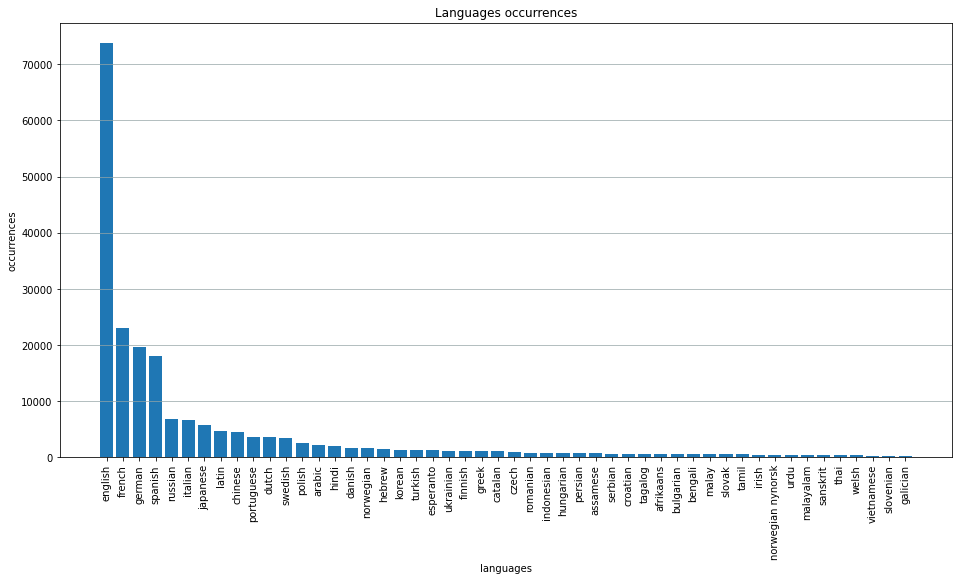

In [71]:
first_fifty = most_declared_languages[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

#### Pie chart of the languages with the greatest number of occurrences

The 6 most known languages compared to the other

In [72]:
split_index = 6
most_declared_languages_six = most_declared_languages[:split_index]
other = most_declared_languages[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
most_declared_languages_six = most_declared_languages_six.append(other, ignore_index = True)
most_declared_languages_six

,language,count
0,english,73755
1,french,23105
2,german,19650
3,spanish,18053
4,russian,6885
5,italian,6626
6,other,69001


Plot a pie chart

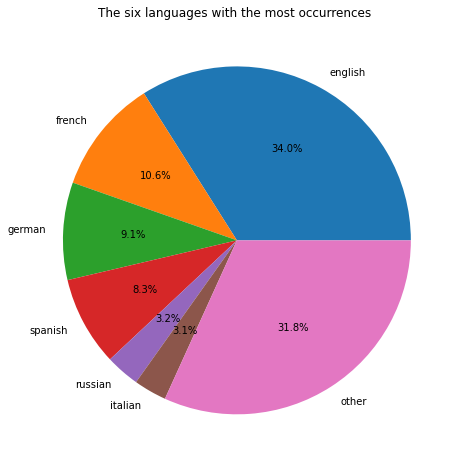

In [73]:
plt.figure(figsize=(16,8))
plt.pie(most_declared_languages_six['count'], labels=most_declared_languages_six['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences ')
plt.show()

Occurrences

In [74]:
occurrences = english_languages_refactored_df.groupby(['language', 'level']).size().to_frame('count').reset_index().set_index(['language', 'level']).sort_values('count', ascending=False) 
occurrences.head()

count
language level       
english  6      35179
         3      14806
french   1       8404
english  4       8197
         2       7381

Simple bar chart

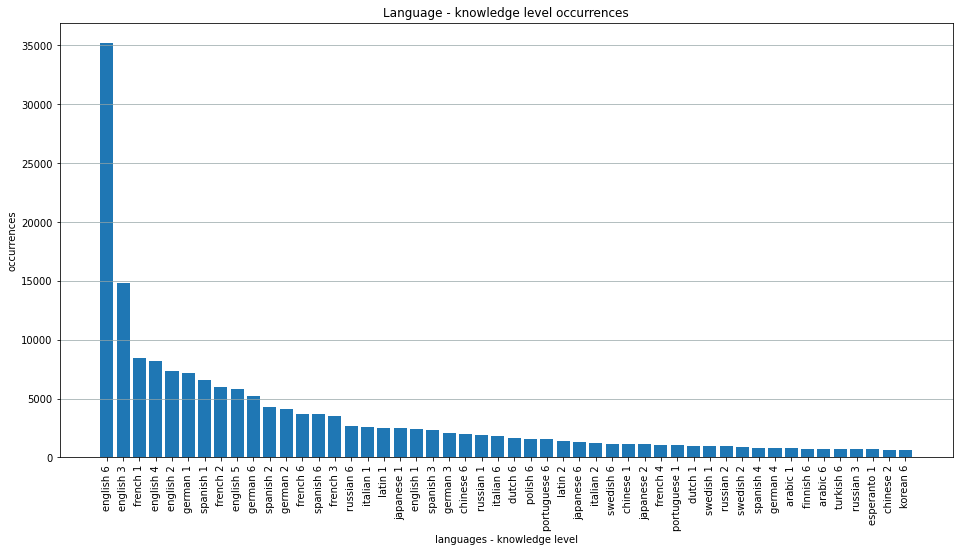

In [75]:
first_fifty = occurrences[:50]
labels = [ ' '.join([str(value[0]), str(value[1])]) for value in first_fifty.index.values ]
plt.figure(figsize=(16,8))
plt.bar(labels, first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Language - knowledge level occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages - knowledge level')
plt.show()

## Bar chart of means

In [76]:
means = english_languages_refactored_df.groupby(['language'])['level'].mean().to_frame('mean').reset_index().sort_values('mean', ascending=False)
means.head()

,language,mean
1,afar,6.0
117,oromo,6.0
45,ewe,6.0
62,herero,6.0
82,kikuyu,6.0


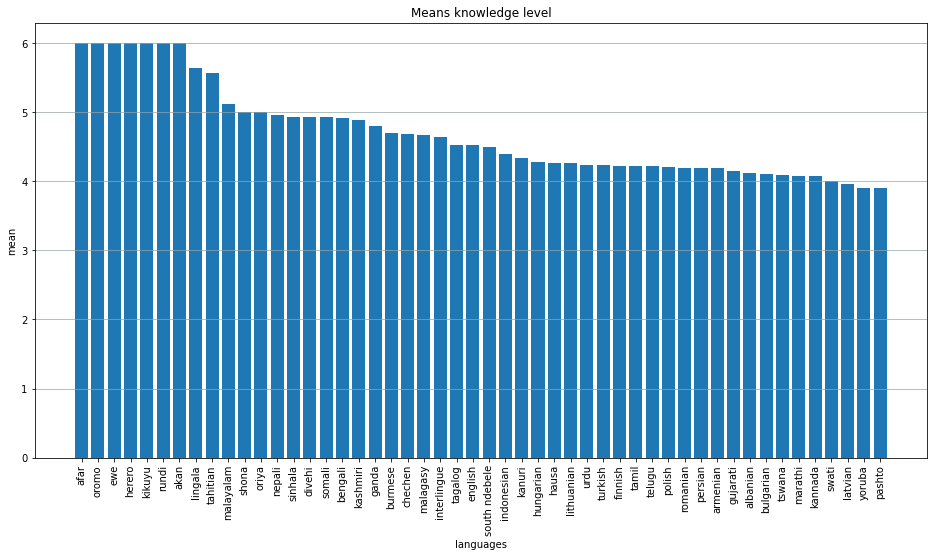

In [77]:
first_fifty = means[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['mean'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Means knowledge level')
plt.ylabel('mean')
plt.xlabel('languages')
plt.show()

## Native speaker analysis

In [78]:
native_speaker = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 6,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
native_speaker.head()

,language,count
36,english,35179
48,german,5242
42,french,3700
129,spanish,3653
116,russian,2707


Dimension

In [79]:
native_speaker.shape

(163, 2)

Bar chart

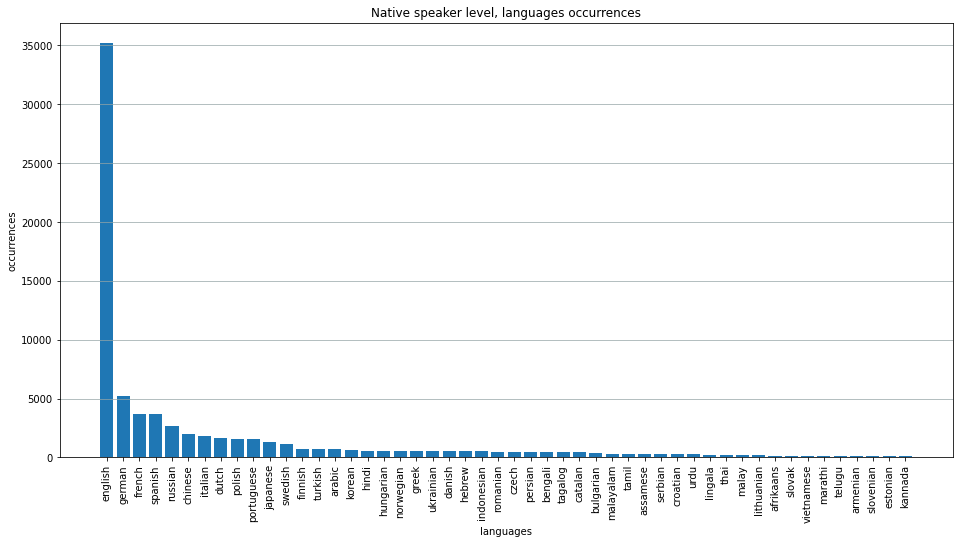

In [80]:
first_fifty = native_speaker[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Native speaker level, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six most known languages

In [81]:
split_index = 6
most_declared_languages_six = native_speaker[:split_index]
other = native_speaker[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
native_speaker = most_declared_languages_six.append(other, ignore_index = True)
native_speaker

,language,count
0,english,35179
1,german,5242
2,french,3700
3,spanish,3653
4,russian,2707
5,chinese,2018
6,other,25857


Pie chart using the six most known languages

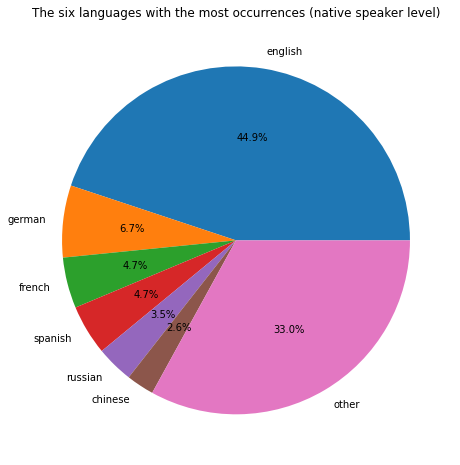

In [82]:
plt.figure(figsize=(16,8))
plt.pie(native_speaker['count'], labels=native_speaker['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (native speaker level)')
plt.show()

## Level 5 language knowledge

In [83]:
level_five = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 5,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_five.head()

,language,count
20,english,5792
24,french,415
68,spanish,328
27,german,244
62,russian,167


Dimension

In [84]:
level_five.shape

(80, 2)

Bar chart

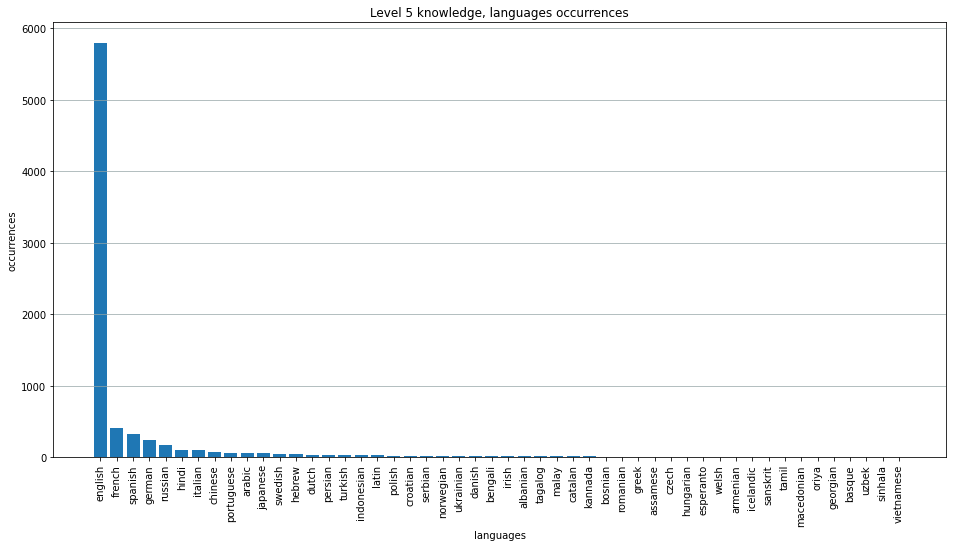

In [85]:
first_fifty = level_five[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 5 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six languages with the greatest amount of occurrences

In [86]:
split_index = 6
most_declared_languages_six = level_five[:split_index]
other = level_five[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_five = most_declared_languages_six.append(other, ignore_index = True)
level_five

,language,count
0,english,5792
1,french,415
2,spanish,328
3,german,244
4,russian,167
5,hindi,101
6,other,1004


Pie chart

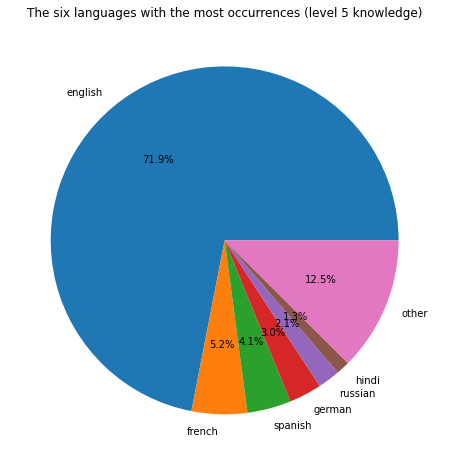

In [87]:
plt.figure(figsize=(16,8))
plt.pie(level_five['count'], labels=level_five['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 5 knowledge)')
plt.show()

## Level 4 language knowledge

In [88]:
level_four = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 4,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_four.head()

,language,count
27,english,8197
32,french,1079
96,spanish,836
37,german,803
88,russian,446


In [89]:
level_four.shape

(118, 2)

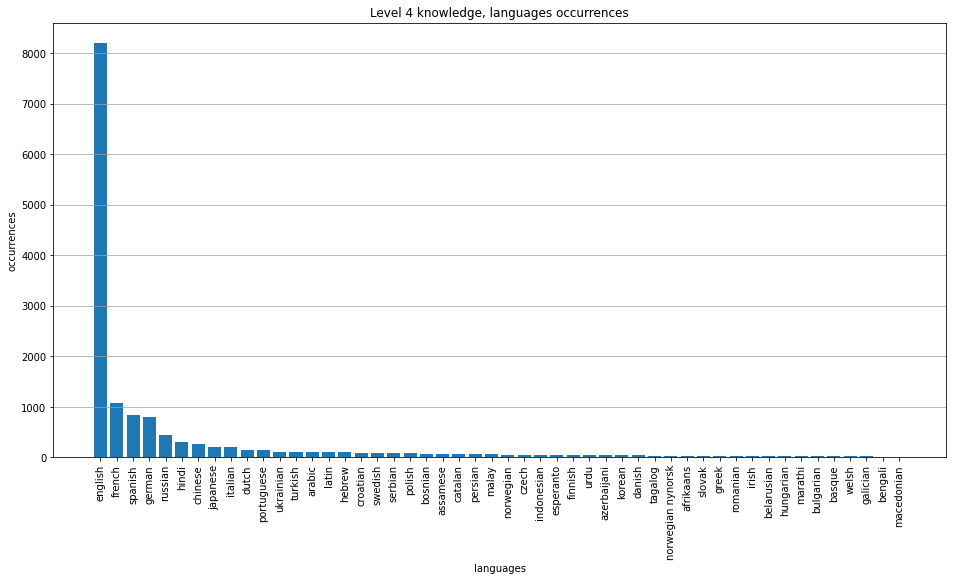

In [90]:
first_fifty = level_four[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 4 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [91]:
split_index = 6
most_declared_languages_six = level_four[:split_index]
other = level_four[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_four = most_declared_languages_six.append(other, ignore_index = True)
level_four

,language,count
0,english,8197
1,french,1079
2,spanish,836
3,german,803
4,russian,446
5,hindi,296
6,other,3333


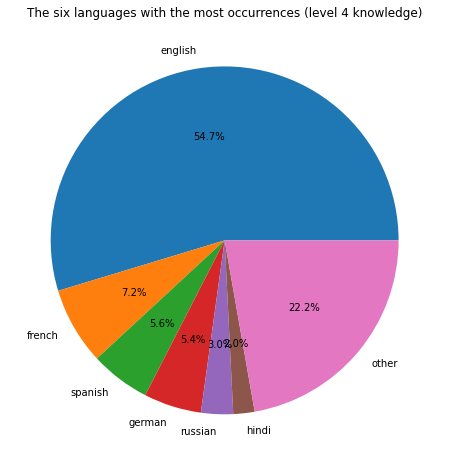

In [92]:
plt.figure(figsize=(16,8))
plt.pie(level_four['count'], labels=level_four['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 4 knowledge)')
plt.show()

## Level 3 language knowledge

In [93]:
level_three = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 3,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_three.head()

,language,count
30,english,14806
35,french,3539
108,spanish,2358
40,german,2081
98,russian,678


In [94]:
level_three.shape

(136, 2)

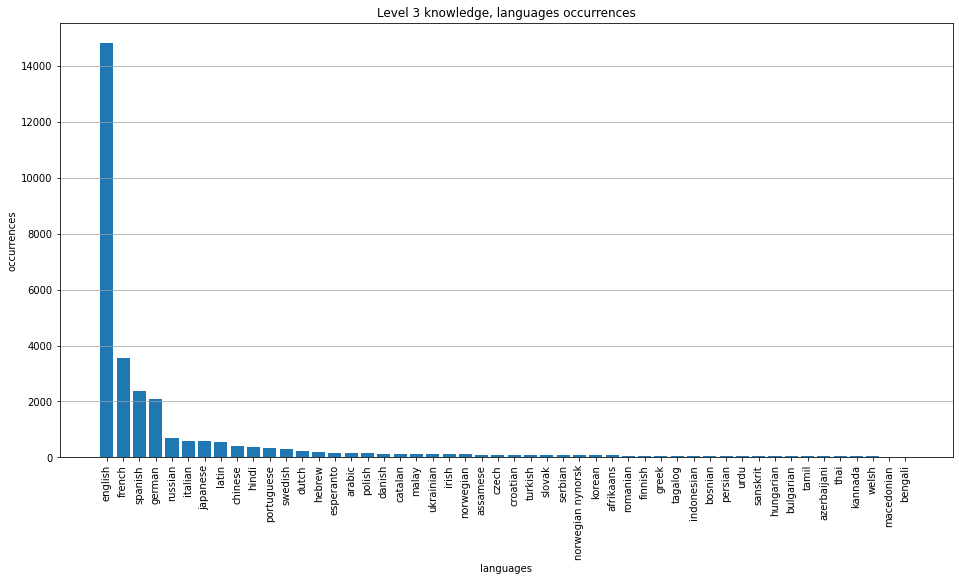

In [95]:
first_fifty = level_three[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 3 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [96]:
split_index = 6
most_declared_languages_six = level_three[:split_index]
other = level_three[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_three = most_declared_languages_six.append(other, ignore_index = True)
level_three

,language,count
0,english,14806
1,french,3539
2,spanish,2358
3,german,2081
4,russian,678
5,italian,605
6,other,6403


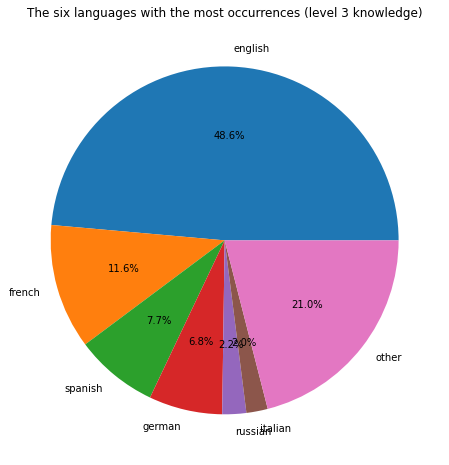

In [97]:
plt.figure(figsize=(16,8))
plt.pie(level_three['count'], labels=level_three['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 3 knowledge)')
plt.show()

## Level 2 language knowledge

In [98]:
level_two = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 2,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_two.head()

,language,count
32,english,7381
37,french,5968
110,spanish,4278
41,german,4148
70,latin,1387


In [99]:
level_two.shape

(138, 2)

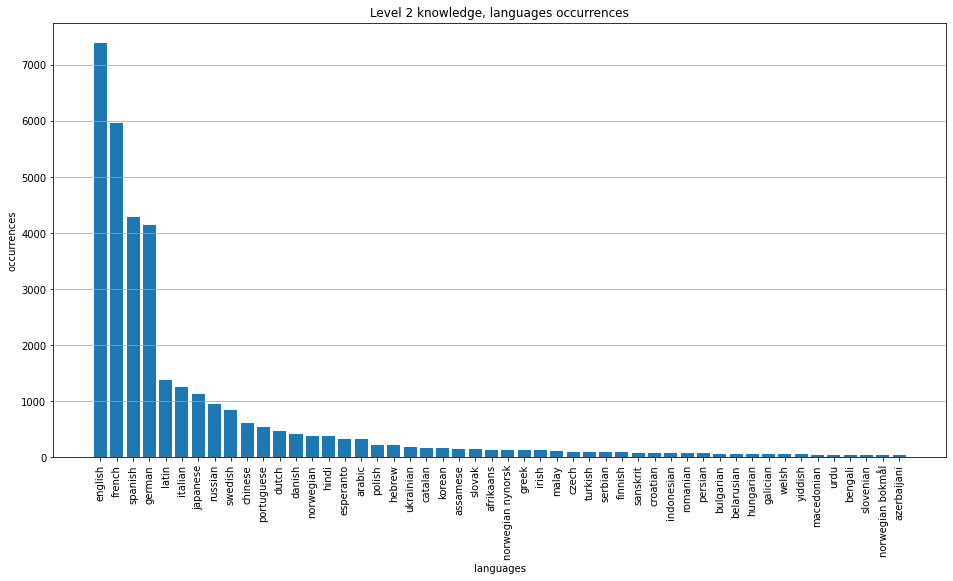

In [100]:
first_fifty = level_two[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 2 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [101]:
split_index = 6
most_declared_languages_six = level_two[:split_index]
other = level_two[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_two = most_declared_languages_six.append(other, ignore_index = True)
level_two

,language,count
0,english,7381
1,french,5968
2,spanish,4278
3,german,4148
4,latin,1387
5,italian,1255
6,other,10894


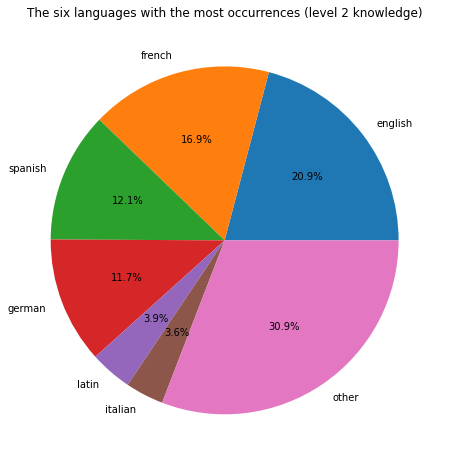

In [102]:
plt.figure(figsize=(16,8))
plt.pie(level_two['count'], labels=level_two['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 2 knowledge)')
plt.show()

## Level 1 language knowledge

In [103]:
level_one = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 1,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_one.head()

,language,count
43,french,8404
47,german,7132
127,spanish,6600
65,italian,2625
78,latin,2537


In [104]:
level_one.shape

(160, 2)

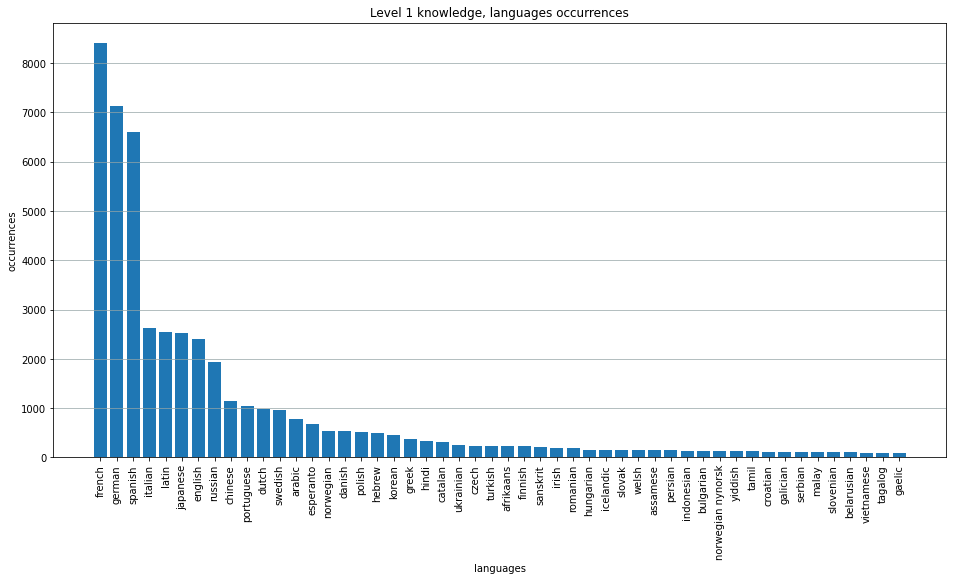

In [105]:
first_fifty = level_one[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 1 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [106]:
split_index = 6
most_declared_languages_six = level_one[:split_index]
other = level_one[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_one = most_declared_languages_six.append(other, ignore_index = True)
level_one

,language,count
0,french,8404
1,german,7132
2,spanish,6600
3,italian,2625
4,latin,2537
5,japanese,2528
6,other,20071


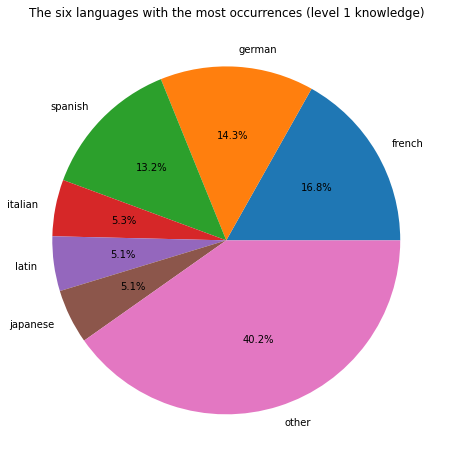

In [107]:
plt.figure(figsize=(16,8))
plt.pie(level_one['count'], labels=level_one['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 1 knowledge)')
plt.show()

## Level 0 language knowledge

In [108]:
level_zero = english_languages_refactored_df.loc[english_languages_refactored_df['level'] == 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_zero.head()

,language,count
43,german,569
38,french,511
56,japanese,482
108,spanish,429
99,russian,307


In [109]:
level_zero.shape

(136, 2)

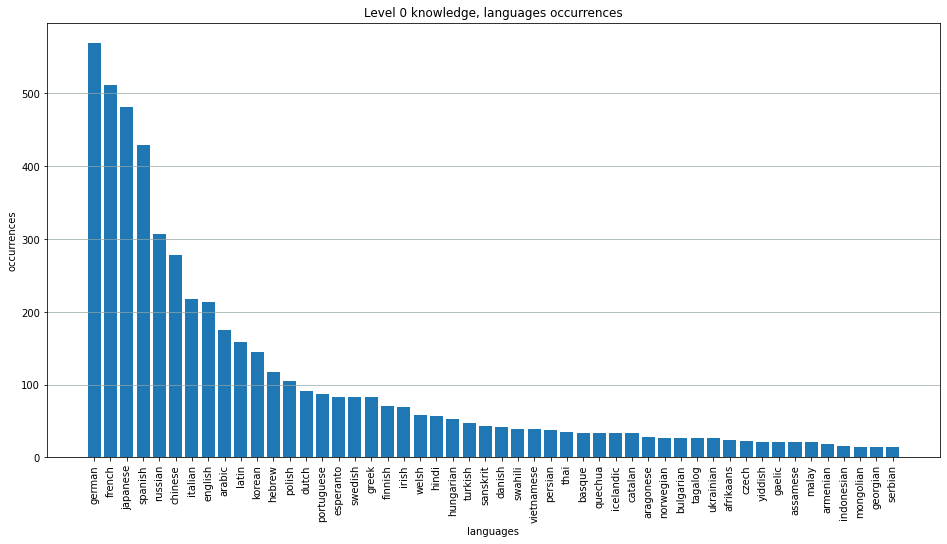

In [110]:
first_fifty = level_zero[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 0 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [111]:
split_index = 6
most_declared_languages_six = level_zero[:split_index]
other = level_zero[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_zero = most_declared_languages_six.append(other, ignore_index = True)
level_zero

,language,count
0,german,569
1,french,511
2,japanese,482
3,spanish,429
4,russian,307
5,chinese,278
6,other,3068


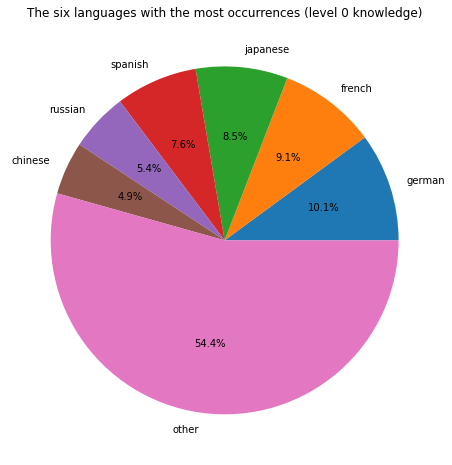

In [112]:
plt.figure(figsize=(16,8))
plt.pie(level_zero['count'], labels=level_zero['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 0 knowledge)')
plt.show()